#Вариант 14
Кривенцова Л.С. 0382

Результаты статистического эксперимента приведены в таблице 1. Требуется оценить характер (случайной) зависимости переменной $Y$ от уровня фактора $X$ (простая группировка)

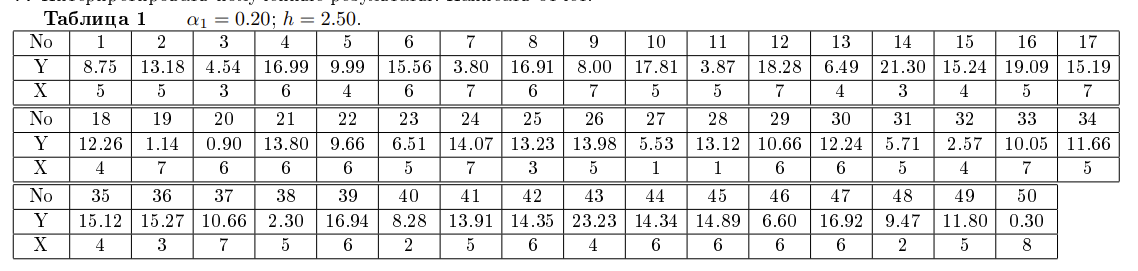

In [32]:
Y <- c(8.75, 13.18, 4.54, 16.99, 9.99, 15.56, 3.80, 16.91, 8.00, 17.81, 3.87, 18.28, 6.49, 21.30, 15.24, 19.09, 15.19, 12.26, 1.12, 0.90, 13.80, 9.66, 6.51, 14.07, 13.23, 13.98, 5.53, 13.12, 10.66, 12.24, 5.71, 2.57, 10.05, 11.66, 15.12, 15.27, 10.66, 2.30, 16.94, 8.28, 13.91, 14.35, 23.23, 14.34, 14.89, 6.60, 16.92, 9.47, 11.80, 0.30)
x <- c(5, 5, 3, 6, 4, 6, 7, 6, 7, 5, 5, 7, 4, 3, 4, 5, 7, 4, 7, 6, 6, 6, 5, 7, 3, 5, 1, 1, 6, 6, 5, 4, 7, 5, 4, 3, 7, 5, 6, 2, 5, 6, 4, 6, 6, 6, 6, 2, 5, 8)
n <- 50
a1 <- 0.20
h <- 2.50
X<-factor(x)
experiment <- data.frame(X, Y)

### 1. Построить графически зависимость переменных $Y_i$ от уровней фактора $X$.



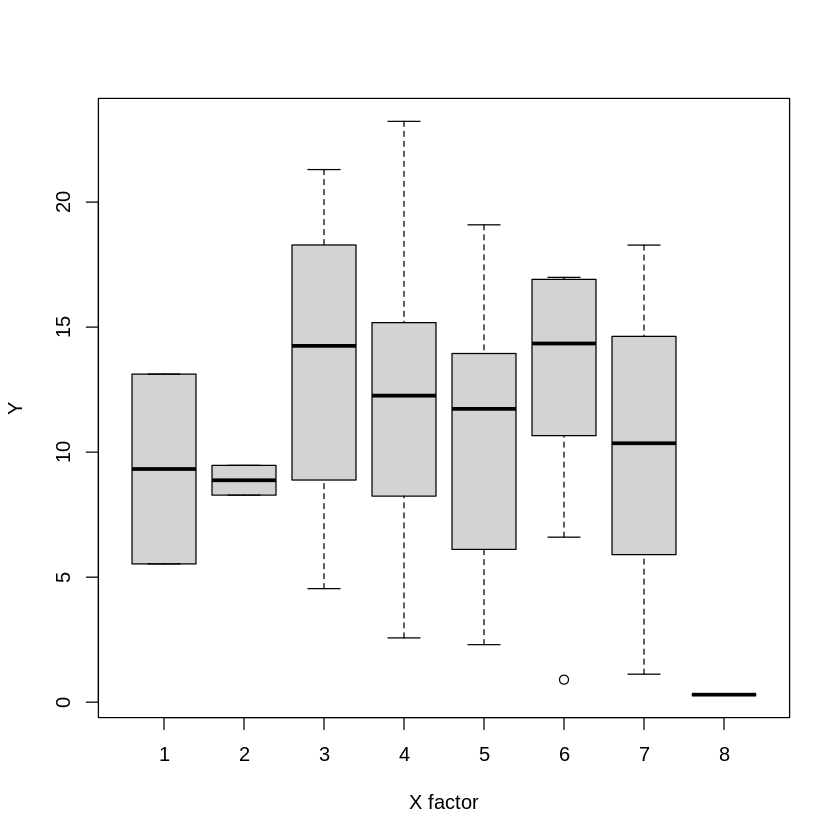

In [33]:
plot(X, Y, xlab = 'X factor', ylab = 'Y')

Введем дополнительное предположение: $Y_{ij} \sim 𝒩(\eta_i, \sigma^2)$, в линейной регрессии говорили об общем среднем, в $ANOVA$ говорим о том, что каждая группа может иметь своей среднее ($\eta_i$), но дисперсия везде одинакова.

*Модель однофакторного дисперсионного анализа зависимости значений $Y$ от уровней фактора $X$:* $$𝔼(Y_j|X_j=i)=\eta_i <=> 𝔼(Y_j|X_j)=\eta_1 \mathbb{1}_{X_j=1} + \eta_2 \mathbb{1}_{X_j=2} + \cdots + \eta_k \mathbb{1}_{X_j=k}$$

$𝔼(Y_{ij})$ - математическое ожидание $Y_{ij}$ при условии $X_j$.

$Y$ - вектор всех наблюдений (упорядоченный), берем 1 строку + 2 + 3 + итд.

$𝔼(Y) = \begin {pmatrix}
1 & 0 & 0 & \cdots & 0\\
1 & 0 & 0 & \cdots & 0\\
\cdots & \cdots & \cdots & \cdots & \cdots\\
0 & 1 & 0 & \cdots & 0\\
0 & 1 & 0 & \cdots & 0\\
0 & 1 & 0 & \cdots & 0\\
\cdots & \cdots & \cdots & \cdots & \cdots\\
0 & 0 & 0 & \cdots & 1\\
0 & 0 & 0 & \cdots & 1\\
\end {pmatrix} \begin {pmatrix}
\eta_1\\
\eta_2\\
\vdots\\
\vdots\\
\eta_k
\end {pmatrix} = matrix (n \times k) \cdot matrix(k\times1)$

Модель линейной регрессии для однофакторного дисперсионного анализа (номер столбца с единицами - номер группы, $i$-ый стоблец - математическое ожидание равно $\eta_i$). Строка матрицы - индикатор для группы.

$Y_{ij} = \eta_i + \varepsilon_{ij},$ если упорядочим $Y_i$ по уровням $j$ фактора $X$, обозначив за $Y_{ji}$.  




In [34]:
aggregate(experiment$Y, list(experiment$X), FUN=length)

Group.1,x
<fct>,<int>
1,2
2,2
3,4
4,7
5,12
6,14
7,8
8,1


Модель данного эксперимента не является сбалансированным.

In [42]:
cat('МНК:')
n.hat <- aggregate(experiment$Y, list(experiment$X), FUN=mean)
colnames(n.hat)[1] <- 'lvl'
colnames(n.hat)[2] <- 'etta'
n.hat

МНК:

lvl,etta
<fct>,<dbl>
1,9.32500
2,8.87500
3,13.58500
4,12.12857
5,10.71417
6,12.91143
7,10.14625
8,0.30000


In [43]:
k <- length(n.hat$lvl)

f <- function(df){
  tmp_s <- c()
  for(i in n.hat$lvl) {
    Yji <- df$Y[df$X == i]
    tmp_s  <- c(tmp_s, sum((Yji-rep(n.hat$etta[n.hat$lvl==i], length(Yji)))^2))
  }  
  return(tmp_s)
}

sigma_2 <- sum(f(experiment))/(n-k)
cat('Несмещенная оценка дисперсии: ', sigma_2)

Несмещенная оценка дисперсии:  30.27996

In [45]:
for(i in n.hat$lvl){
    S <- sqrt(sigma_2)
    left <- n.hat$etta[n.hat$lvl==i]-qt(1-a1/2, n-k)*S/sqrt(length(experiment$Y[experiment$X == i]))
    right<- n.hat$etta[n.hat$lvl==i]+qt(1-a1/2, n-k)*S/sqrt(length(experiment$Y[experiment$X == i]))
    
    cat('ДИ для ',i,': [',left, '; ', right, ']\n')
} 

ДИ для  1 : [ 4.258764 ;  14.39124 ]
ДИ для  2 : [ 3.808764 ;  13.94124 ]
ДИ для  3 : [ 10.00263 ;  17.16737 ]
ДИ для  4 : [ 9.420554 ;  14.83659 ]
ДИ для  5 : [ 8.645884 ;  12.78245 ]
ДИ для  6 : [ 10.99657 ;  14.82629 ]
ДИ для  7 : [ 7.613132 ;  12.67937 ]
ДИ для  8 : [ -6.86474 ;  7.46474 ]


###3. Сформулировать модель однофакторного дисперсионного анализа, когда наибольший уровень фактора $X$ рассмативается как базовый. Построить МНК оценки параметров и несмещенную оценку дисперсии. В предположении нормальности ошибок построить доверительные интервалы для параметров уровня доверия $1 − \alpha$.


*Модель однофакторного дисперсионного анализа, когда наибольший уровень фактора $X$ рассмативается как базовый:*

Введём веса $ν_i$ 
(Вес на каждую группу согласно уровню) 

$∑^k_{i=1}ν_i = 1$

$μ=∑^k_{i=1}ν_i𝜂_i$ - взвешенное среднее
 $α_i=𝜂_i-μ$ - главный эффект i-ой группы  $∑^k_{i=1}ν_iα_i = 0$

$$
=>\begin{cases}
Y_{ij} = \mu + \alpha_i + \varepsilon_{ij} \\
Y_{ij} \sim N(\mu + \alpha_i, \sigma^2),
\end{cases}
$$


> На основе заданных значений - наибольший уровень фактора: 
$μ = 𝜂_6, α_6 = 0$.


*МНК оценка параметров:*

$\hat{\mu} = ∑^k_{j=1}ν_j\hat{𝜂_j} = ∑^k_{j=1}ν_j\overline{Y_{j+}}$

$\hat{α_j} = \hat{𝜂_j} - \hat{μ} = \overline{Y_{j+}} - ∑^k_{j=1}ν_j\overline{Y_{j+}}$

*Несмещенная оценка дисперсии:*

$\hat{σ^2}=\frac{∑^{k}_{j=1}∑^{n_j}_{i=1} (Y_{ji} - \hat{\mu} - \hat{\alpha_j})^2}{n-k}$


In [46]:
cat('МНК парметров:')
n.hat_main <- n.hat[6, 2] 
n.hat2 <- n.hat[-7,c(1, 2)]
n.hat2[, 3] <- n.hat2[, 2] - n.hat_main
colnames(n.hat2) <- c('lvl', 'etta' ,'alp')
n.hat2

МНК парметров:

,lvl,etta,alp
,<fct>,<dbl>,<dbl>
1,1,9.32500,-3.5864286
2,2,8.87500,-4.0364286
3,3,13.58500,0.6735714
4,4,12.12857,-0.7828571
5,5,10.71417,-2.1972619
6,6,12.91143,0.0000000
8,8,0.30000,-12.6114286


In [48]:
k <- length(n.hat2$lvl)
f <- function(df){
  tmp_s <- c()
  for(i in n.hat2$lvl) {
    Yji <- df$Y[df$X == i]
    alph <- rep(n.hat2$alp[n.hat2$lvl==i], length(Yji))
    tmp_s  <- c(tmp_s , sum((Yji-rep(n.hat_main, length(Yji))-alph)^2))
  }  
  return(tmp_s)
}

sigma_2 <- sum(f(experiment))/(n-k)
cat('Несмещенная оценка дисперсии: ', sigma_2)

Несмещенная оценка дисперсии:  24.14273

In [50]:
for(i in n.hat2$lvl){
    S <- sqrt(sigma_2)
    nj <- length(experiment$Y[experiment$X == i])
    n6 <- length(experiment$Y[experiment$X == 5])
    sq <-sqrt((nj+n6)/(nj*n6))
    left <- n.hat2$alp[n.hat2$lvl==i]-qt(1-a1/2, n-k)*sq*S
    right<- n.hat2$alp[n.hat2$lvl==i]+qt(1-a1/2, n-k)*sq*S
    
    cat('ДИ для ',i,': [',left, '; ', right, ']\n')
} 

ДИ для  1 : [ -8.470848 ;  1.297991 ]
ДИ для  2 : [ -8.920848 ;  0.8479911 ]
ДИ для  3 : [ -3.018703 ;  4.365846 ]
ДИ для  4 : [ -3.824385 ;  2.25867 ]
ДИ для  5 : [ -4.808094 ;  0.4135702 ]
ДИ для  6 : [ -2.515861 ;  2.515861 ]
ДИ для  8 : [ -19.26777 ;  -5.955087 ]


###4. На основании результатов, полученных в предыдущих пунктах, проверить визуально монотонность влияния фактора  $X$ на результат. Построить графически оценку зависимости результата от уровней фактора $X$. Как данная зависимость согласуется с результатами пункта 1, если наложить один график на другой.

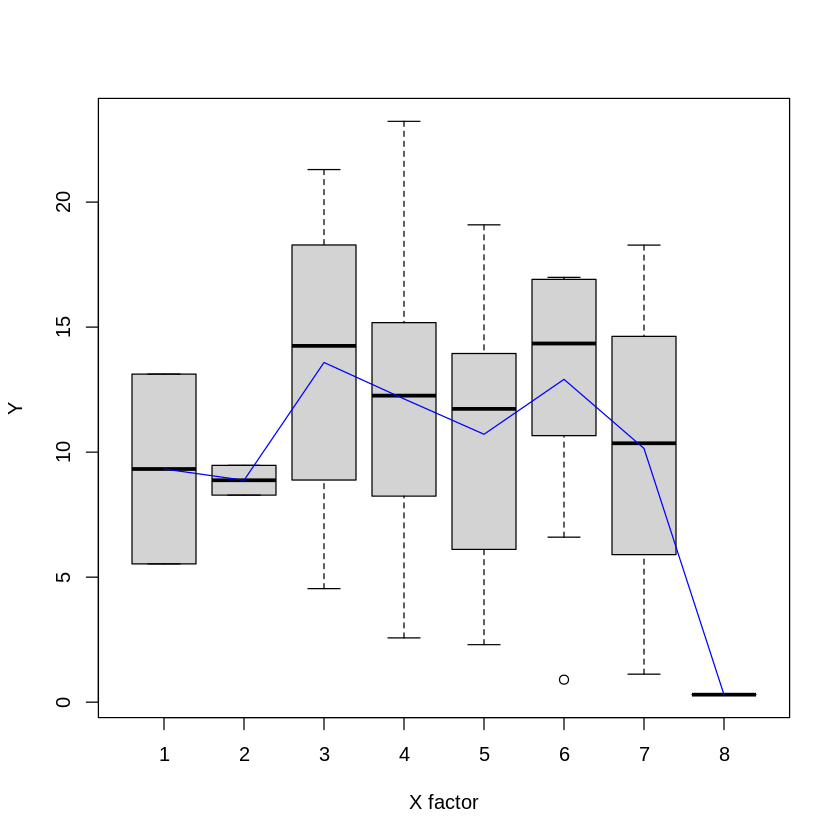

In [51]:
plot(X, Y, xlab = 'X factor', ylab = 'Y')

lines(n.hat$lvl, n.hat$etta, col="blue")

Исходя из данных, предствленных на графике -  линия проходит примерно по центру каждого "блока" значений, соответвующих определнённому уровню, что говорит о том, что $Y$ зависит от фактора.

###5. Провести анализ ошибок. На базе ошибок построить гистограмму с шагом $h$. Оценить расстояние полученной оценки до класса центрированных нормальных распределений по Колмогорову.



*Оценка расстояния полученной оценки до класса нормальных распределений по Колмогорову:*

Pасстояние: 

$$KS = \sqrt{n}\cdot sup|F_n(x) - F_0(x)|$$,

где
$n$  - длина вборки,


$F_n$ - эмпирическая функция распределения,

$F_0$  - теоретическая функция распределения 

 <=>

$$\tilde {KS}=\underset{0, \sigma}{inf} {KS(0, \sigma)}$$

1             2             3             4             5 
-1.964167e+00  2.465833e+00 -9.045000e+00  4.078571e+00 -2.138571e+00 
            6             7             8             9            10 
 2.648571e+00 -6.346250e+00  3.998571e+00 -2.146250e+00  7.095833e+00 
           11            12            13            14            15 
-6.844167e+00  8.133750e+00 -5.638571e+00  7.715000e+00  3.111429e+00 
           16            17            18            19            20 
 8.375833e+00  5.043750e+00  1.314286e-01 -9.026250e+00 -1.201143e+01 
           21            22            23            24            25 
 8.885714e-01 -3.251429e+00 -4.204167e+00  3.923750e+00 -3.550000e-01 
           26            27            28            29            30 
 3.265833e+00 -3.795000e+00  3.795000e+00 -2.251429e+00 -6.714286e-01 
           31            32            33            34            35 
-5.004167e+00 -9.558571e+00 -9.625000e-02  9.458333e-01  2.991429e+00 
           36            37            38            39            40 
 1.685000e+00  5.137500e-01 -8.414167e+00  4.028571e+00 -5.950000e-01 
           41            42            43            44            45 
 3.195833e+00  1.438571e+00  1.110143e+01  1.428571e+00  1.978571e+00 
           46            47            48            49            50 
-6.311429e+00  4.008571e+00  5.950000e-01  1.085833e+00 -3.608225e-16

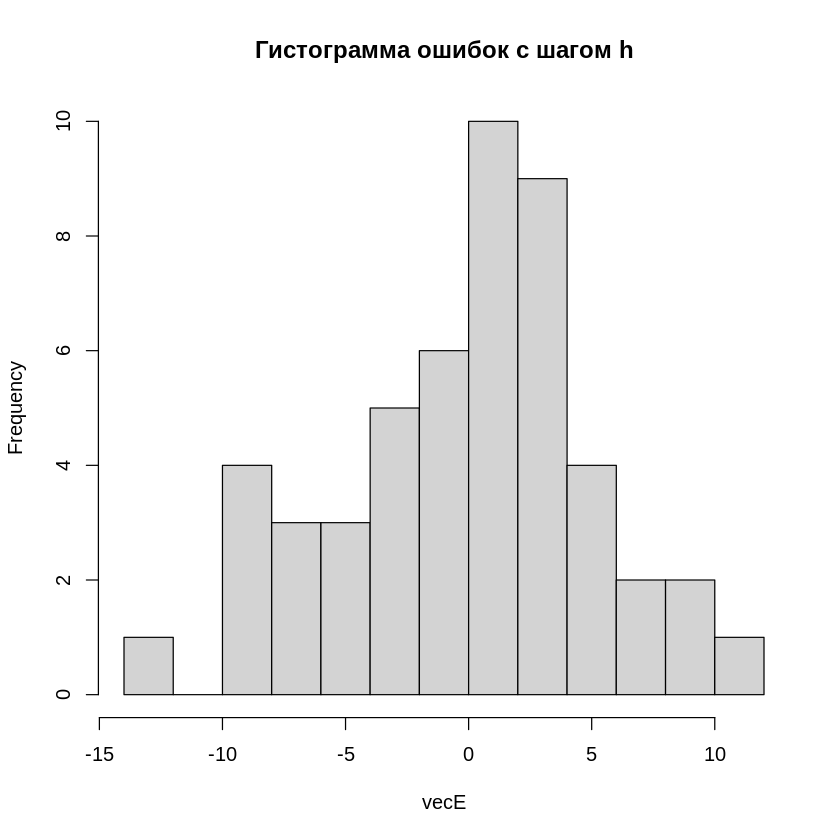

In [56]:
vecE <- aov(Y ~ X, experiment)$residuals
vecE
brk <- seq(--10, 10, h)
hist(vecE, breaks = brk, main="Гистограмма ошибок с шагом h")

Оценка: 4.482016 
Расстояние: 0.08045922

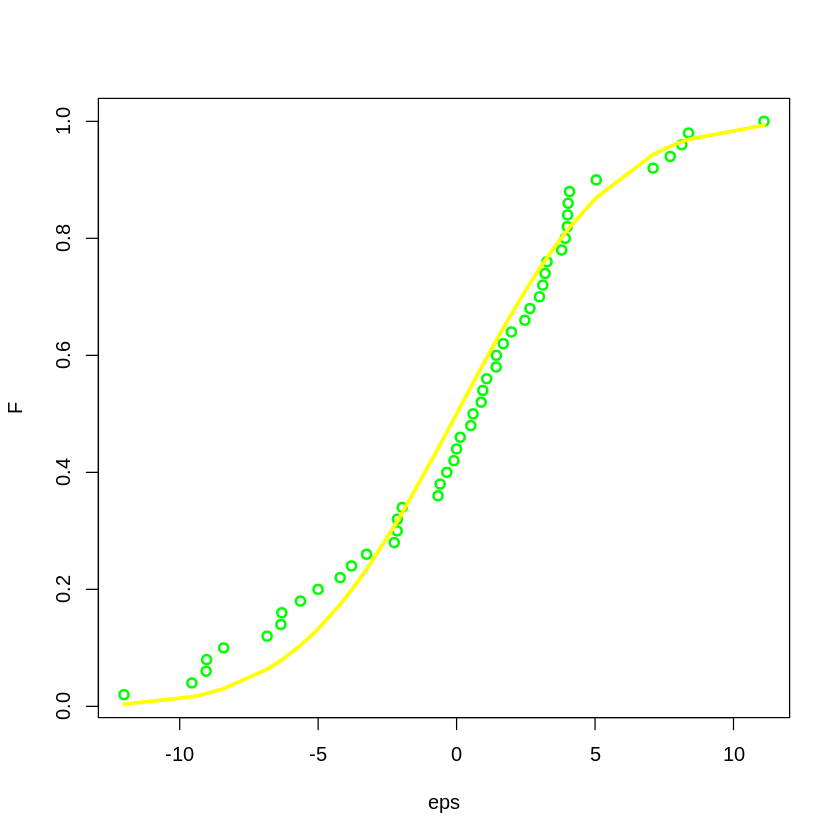

In [58]:
row = sort(vecE)

Fn <- ecdf(row)
varX_i_1 <- row
varX_i <- c(varX_i_1 [2:length(varX_i_1)], 1)

KS_stat <- function(sigma) {
  m1 <- max(abs(Fn(varX_i_1) - pnorm(varX_i_1, 0, sigma)))
  m2 <- max(abs(Fn(varX_i) - pnorm(varX_i, 0, sigma)))
  return(max(m1, m2))
}

KS <- nlm(KS_stat, sqrt(sigma_2))
KS_min <- KS$minimum
KS_est <- KS$estimate

cat('Оценка:', (KS_est), '\nРасстояние:', (KS_min))

plot(row, Fn(row), col="green", lwd = 2, xlab = "eps", ylab = "F",)
lines(row, pnorm(row, 0, KS$estimate), col="yellow", lwd = 3)    

Расстояние до класса нормальных распределений по Колмогорову довольно мало, исходя из этого - ошибки имеют нормальное распределение. График также подверждает это.

###6. Составить таблицу дисперсионного анализа. Проверить значимость влияния фактора $X$ на результаты эксперимента.

$SST = SSW + SSB = ∑^k_{j=1}∑^{n_j}_{i=1}(Y_{ji}-\overline{Y})^2$  

$SSB = ∑^k_{j=1}n_j(\overline{Y_{j+}} - \overline{Y})^2= ∑^k_{j=1}n_j(𝜂_j - \overline{Y})^2$

$SSW = ∑^k_{j=1}∑^{n_j}_{i=1}(Y_{ji} - \overline{Y_{j+}})^2 = ∑^k_{j=1}∑^{n_j}_{i=1}(Y_{ji} - \hat{𝜂_j})^2$


*Значимость влияния фактора:*

Статистика критерия - $F=\frac{n-k}{k-1}\frac{SSB}{SSW} \sim 𝔽_{k-1,n-k}$ 

Критерий независимости - $F < x_α$, где $x_α: 𝔽_{q,n-r}(x_α) = 1-α$

In [60]:
aov(Y ~ X, experiment)

Call:
   aov(formula = Y ~ X, data = experiment)

Terms:
                       X Residuals
Sum of Squares   217.333  1271.758
Deg. of Freedom        7        42

Residual standard error: 5.502723
Estimated effects may be unbalanced

Таблица дисперсионного анализа:

|| Источник разброса   | Сумма квадратов  | Степени свободы | 
|-----|------|-----|----|
|SSW| Внутри групп   |1271.758  | 42 | 
|SSB | Между группами|217.333  | 7 | 
|SST| Всего          |1489.091  | 49  |


In [63]:
SSB <- 217.333
SSW <- 1271.758

f <- ((n-k))*SSB/((k-1)*SSW)
cat('Принятие гипотезы:', (f >= qf(1-a1, k-1, n-k)),
   '\nF =', f, 
   '\nКвантиль =', qf(1-a1, k-1, n-k))

Принятие гипотезы: FALSE 
F = 1.224724 
Квантиль = 1.503426